test 1 


In [25]:
import pandas as pd

# Sample dataset (replace this with your dataset)
data = pd.read_csv('data.csv')

def calculate_similarity(user_input, song):
    # Calculate similarity based on mood-related attributes
    attributes = ["danceability", "energy", "valence"]
    similarity = sum((user_input[attr] - song[attr])**2 for attr in attributes)
    return similarity

def recommend_songs(user_input, dataset, num_recommendations=10):
    # Calculate similarity for all songs and sort them
    recommendations = dataset.iterrows()
    recommendations = sorted(recommendations, key=lambda x: calculate_similarity(user_input, x[1]))
    # Get the top N recommendations
    return recommendations[:num_recommendations]

def main():
    print("Welcome to the Mood-Based Playlist Generator!")
    print("Please rate the following attributes on a scale of 1 to 10 (1 = low, 10 = high):")

    danceability = float(input("Danceability: "))
    energy = float(input("Energy: "))
    valence = float(input("Valence:"))

    user_input = {"danceability": danceability, "energy": energy, "valence": valence}

    recommendations = recommend_songs(user_input, data)
    print(user_input)

    print("\nRecommended Songs:")
    for i, (index, song) in enumerate(recommendations):
        print(f"{i + 1}. Song Index: {index}")

if __name__ == "__main__":
    main()


Welcome to the Mood-Based Playlist Generator!
Please rate the following attributes on a scale of 1 to 10 (1 = low, 10 = high):
{'danceability': 3.0, 'energy': 2.0, 'valence': 1.0}

Recommended Songs:
1. Song Index: 99
2. Song Index: 161
3. Song Index: 7
4. Song Index: 16
5. Song Index: 123
6. Song Index: 169
7. Song Index: 79
8. Song Index: 105
9. Song Index: 47
10. Song Index: 164


good code 


Welcome to the Mood-Based Playlist Generator!
Please rate the following attributes on a scale of 1 to 10 (1 = low, 10 = high):
(57, 0.024685999999999996)
(109, 0.039264999999999974)
(66, 0.04014499999999998)
(78, 0.042769999999999996)
(31, 0.043329999999999994)
(180, 0.04461699999999999)
(11, 0.048921)
(29, 0.056507)
(104, 0.058161)
(127, 0.058978)


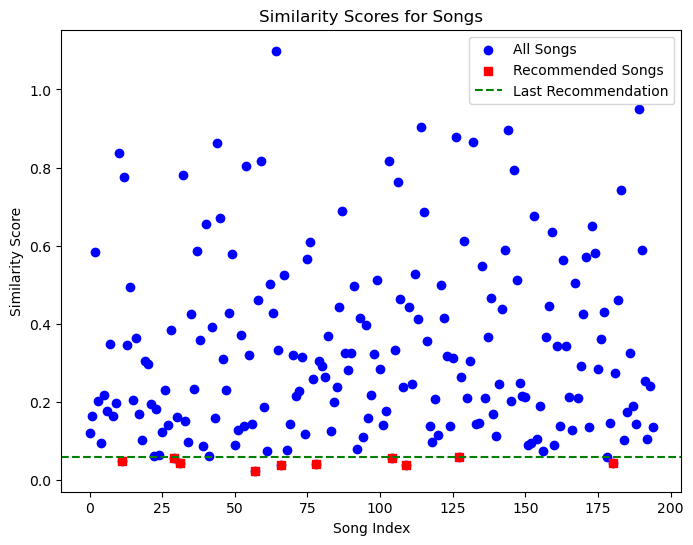

Songs For Your MOOD:
{'danceability': 8.0, 'energy': 3.0, 'valence': 5.0}

Recommended Songs:
1. Song Index: 57
2. Song Index: 109
3. Song Index: 66
4. Song Index: 78
5. Song Index: 31
6. Song Index: 180
7. Song Index: 11
8. Song Index: 29
9. Song Index: 104
10. Song Index: 127


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.express as px

# Sample dataset (replace this with your dataset)
data = pd.read_csv('data.csv')



def calculate_similarity(user_input, song):
    attributes = ["danceability", "energy", "valence"]
    squared_differences = []  # Create an empty list to store squared differences

    # Calculate squared differences for each attribute
    for attr in attributes:
        user_value = user_input[attr] * 0.1
        #print("user val")
        #print(user_value)
        song_value = song[attr]
        #print("song val")
        #print(song_value)
        squared_diff = (user_value - song_value) ** 2
        squared_differences.append(squared_diff)

    #print("sqaured dif:")
    #print(squared_differences)
    # Sum the squared differences to calculate similarity
    similarity = sum(squared_differences)

    return similarity




def plot_similarity_scores(user_input, dataset, recommendations=None):
    similarities = []
    for index, song in dataset.iterrows():
        similarity = calculate_similarity(user_input, song)
        similarities.append(similarity)

    plt.figure(figsize=(8, 6))

    if recommendations is not None:
        rec_indices = [index for index, _ in recommendations]
        rec_similarities = [similarities[index] for index in rec_indices]

        # Plot all songs in blue
        plt.scatter(range(len(similarities)), similarities, marker='o', color='b', label='All Songs')

        # Highlight recommended songs in red with a different marker
        plt.scatter(rec_indices, rec_similarities, marker='s', color='r', label='Recommended Songs')

        # Add a horizontal line at the last recommended song's similarity score
        last_recommendation_similarity = rec_similarities[-1]
        plt.axhline(last_recommendation_similarity, color='g', linestyle='--', label='Last Recommendation')


    else:
        # If no recommendations, just plot all songs
        plt.scatter(range(len(similarities)), similarities, marker='o', color='b', label='All Songs')

    

    plt.title('Similarity Scores for Songs')
    plt.xlabel('Song Index')
    plt.ylabel('Similarity Score')
    plt.legend()
    plt.show()




def recommend_songs(user_input, dataset, num_recommendations=10):
    # Create a copy of the dataset to work with
    dataset_copy = dataset.copy()

    # Initialize a list to store the recommended songs
    recommendations = []

    # Calculate and get recommendations one at a time
    for _ in range(num_recommendations):
        # Calculate the similarity between the user input and each song in the current dataset
        similarities = []

        for index, song in dataset_copy.iterrows():
            similarity = calculate_similarity(user_input, song)
            similarities.append((index, similarity))

        # Sort the songs based on their similarity to the user input
        similarities = sorted(similarities, key=lambda x: x[1])

        # Get the top recommendation from the sorted list
        top_recommendation = similarities[0]
        #print('Lowest Similarity Score:')
        print(top_recommendation)
        #print('Song index:')
         #print(top_recommendation[0])

        # Add the top recommendation to the recommendations list
        recommendations.append(top_recommendation)

        # Remove the recommended song from the dataset
        index_to_remove = top_recommendation[0]
        dataset_copy = dataset_copy.drop(index_to_remove)

    return recommendations



def main():
    print("Welcome to the Mood-Based Playlist Generator!")
    print("Please rate the following attributes on a scale of 1 to 10 (1 = low, 10 = high):")
    
    danceability = float(input("Danceability: "))
    energy = float(input("Energy: "))
    valence = float(input("Valence:"))

    user_input = {"danceability": danceability, "energy": energy, "valence": valence}
    recommendations = recommend_songs(user_input, data)
    plot_similarity_scores(user_input, data, recommendations)

    print("Songs For Your MOOD:")
    print(user_input)
    print("\nRecommended Songs:")
    for i, (index, song) in enumerate(recommendations):
        print(f"{i + 1}. Song Index: {index}")

if __name__ == "__main__":
    main()
